In [3]:
#Q1-B
import numpy as np

# Original data
scores = np.array([65, 70, 68, 73, 75, 80, 85, 78, 90, 100])

# Number of bootstrap samples
n_bootstrap = 40
bootstrap_means = []

# Generate bootstrap samples and calculate their means
for _ in range(n_bootstrap):
    sample = np.random.choice(scores, size=len(scores), replace=True)
    bootstrap_means.append(np.mean(sample))

# Calculate the 2.5th and 97.5th percentiles for the 95% CI
lower_percentile = np.percentile(bootstrap_means, 2.5)
upper_percentile = np.percentile(bootstrap_means, 97.5)

print(f"95% Confidence Interval: [{lower_percentile}, {upper_percentile}]")


95% Confidence Interval: [72.08, 85.10499999999999]


In [4]:
#Q2-A
import numpy as np

# Original scores
scores = np.array([65, 70, 68, 73, 75, 80, 85, 78, 90, 100])

# Shuffle the scores to randomize the assignment
np.random.shuffle(scores)

# Split into 5 subsets, each containing 2 scores
subsets = [scores[i:i+2] for i in range(0, len(scores), 2)]

# Display the subsets
print(subsets)


[array([78, 68]), array([85, 80]), array([65, 75]), array([ 73, 100]), array([90, 70])]


In [10]:
#Q3-A
import pandas as pd
from ISLP import load_data

# Load the OJ dataset
OJ = load_data("OJ")

# Convert the 'Store7' column to numeric if it's not already
OJ['Store7'] = pd.to_numeric(OJ['Store7'], errors='coerce')

# Create a random sample of 800 observations for training
train_data = OJ.sample(n=800, random_state=42)

# Use the remaining observations as the test set
test_data = OJ.drop(train_data.index)

# Display a snapshot of the training and test data
print("Training Data Sample:")
print(train_data.head())

print("\nTest Data Sample:")
print(test_data.head())



Training Data Sample:
    Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
644       CH             239        3     1.79     2.23     0.0     0.0   
629       MM             260        2     1.86     2.18     0.0     0.7   
70        CH             274        4     1.99     2.09     0.0     0.4   
962       CH             227        1     1.69     1.69     0.0     0.0   
787       CH             273        3     1.99     2.09     0.0     0.4   

     SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
644          0          0  0.670149         2.23         1.79       0.44   
629          0          0  0.456000         1.48         1.86      -0.38   
70           0          0  0.718311         1.69         1.99      -0.30   
962          0          0  0.600000         1.69         1.69       0.00   
787          0          0  0.053687         1.69         1.99      -0.30   

     Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
644     NaN 

In [11]:
#Q3-B
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Define predictors and response variable
X_train = train_data.drop('Purchase', axis=1)
y_train = train_data['Purchase']

# Fit the decision tree model
tree_model = DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on training data
y_train_pred = tree_model.predict(X_train)

# Confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)

# Misclassification error on training data
misclassification_train = 1 - np.trace(cm_train) / np.sum(cm_train)

print("Confusion Matrix (Training Data):\n", cm_train)
print(f"Misclassification Error (Training Data): {misclassification_train}")



Confusion Matrix (Training Data):
 [[394 100]
 [ 41 265]]
Misclassification Error (Training Data): 0.17625000000000002


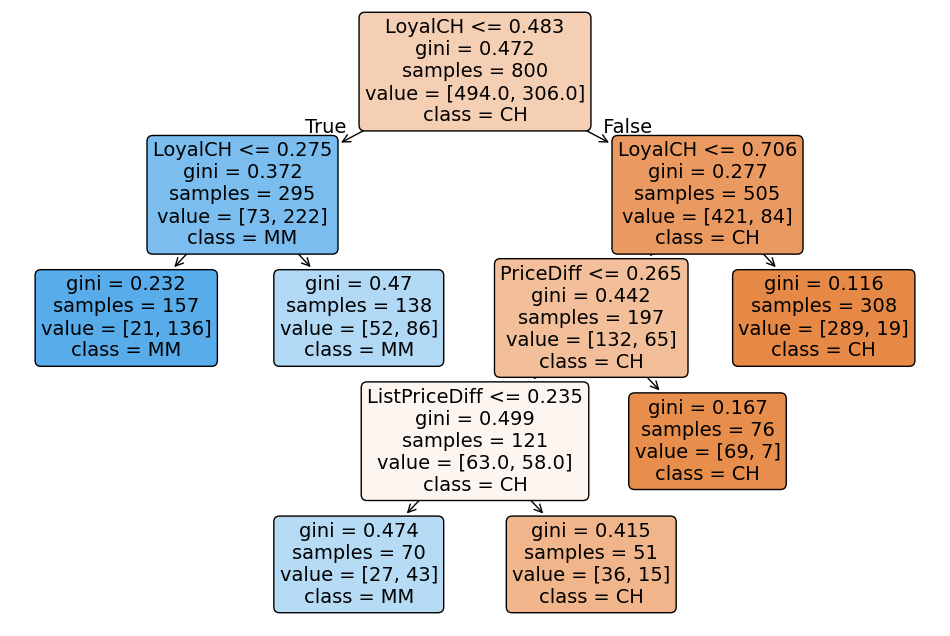

In [12]:
#Q3-C
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=y_train.unique(), rounded=True)
plt.show()



In [13]:
#Q3-D
# Prepare test data
X_test = test_data.drop('Purchase', axis=1)
y_test = test_data['Purchase']

# Predict on test data
y_test_pred = tree_model.predict(X_test)

# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)

# Misclassification error on test data
misclassification_test = 1 - np.trace(cm_test) / np.sum(cm_test)

print("Confusion Matrix (Test Data):\n", cm_test)
print(f"Misclassification Error (Test Data): {misclassification_test}")



Confusion Matrix (Test Data):
 [[128  31]
 [ 14  97]]
Misclassification Error (Test Data): 0.16666666666666663


In [14]:
#Q3-E
# Fit a new decision tree with 8 leaf nodes
tree_model_8 = DecisionTreeClassifier(max_leaf_nodes=8, random_state=42)
tree_model_8.fit(X_train, y_train)

# Predict on the test data
y_test_pred_8 = tree_model_8.predict(X_test)

# Confusion matrix for test data
cm_test_8 = confusion_matrix(y_test, y_test_pred_8)

# Misclassification error on test data
misclassification_test_8 = 1 - np.trace(cm_test_8) / np.sum(cm_test_8)

print("Confusion Matrix (Test Data, 8 leaf nodes):\n", cm_test_8)
print(f"Misclassification Error (Test Data, 8 leaf nodes): {misclassification_test_8}")


Confusion Matrix (Test Data, 8 leaf nodes):
 [[139  20]
 [ 20  91]]
Misclassification Error (Test Data, 8 leaf nodes): 0.14814814814814814


#Q3-F
If the test error increases when using 8 leaf nodes, it suggests overfitting. If the error decreases or stays similar, it indicates no overfitting.
Overfitting: The model fits the training data too well and doesn't generalize to the test data.

In [15]:
#Q3-G
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_leaf_nodes': np.arange(2, 20)}

# Set up GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameter and the best score
print(f"Best Number of Leaf Nodes: {grid_search.best_params_['max_leaf_nodes']}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")



Best Number of Leaf Nodes: 11
Best Cross-Validation Score: 0.80625


In [16]:
#Q3-H
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred_rf = rf_model.predict(X_test)

# Confusion matrix for test data
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Misclassification error on test data
misclassification_test_rf = 1 - np.trace(cm_test_rf) / np.sum(cm_test_rf)

print("Confusion Matrix (Random Forest Test Data):\n", cm_test_rf)
print(f"Misclassification Error (Random Forest Test Data): {misclassification_test_rf}")



Confusion Matrix (Random Forest Test Data):
 [[131  28]
 [ 26  85]]
Misclassification Error (Random Forest Test Data): 0.19999999999999996


In [23]:
#Q3-I
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Ensure data consistency: Check for missing values and handle them
OJ['Store7'] = pd.to_numeric(OJ['Store7'], errors='coerce')  # Ensure 'Store7' is numeric
OJ = OJ.dropna()  # Remove rows with missing values

# Define features and target
X_train = train_data.drop('Purchase', axis=1)
y_train = train_data['Purchase']

# Check data types for consistency
print(X_train.dtypes)

# Define the parameter grid for Random Forest with a reduced search space for debugging
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2']  # Replacing 'auto' with valid options
}

# Set up GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores for faster execution
    verbose=1,  # Display progress for debugging
    error_score='raise'  # Raise an error if any hyperparameter combination fails
)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print(f"Best Random Forest Hyperparameters: {rf_grid_search.best_params_}")
print(f"Best Random Forest Cross-Validation Score: {rf_grid_search.best_score_}")

WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7            float64
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
Best Random Forest Cross-Validation Score: 0.8012499999999999


In [24]:
#Q3-J
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability of positive class
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()




ValueError: y_true takes value in {'CH', 'MM'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [19]:
#Q3-K
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred_gb = gb_model.predict(X_test)

# Confusion matrix for test data
cm_test_gb = confusion_matrix(y_test, y_test_pred_gb)

# Misclassification error on test data
misclassification_test_gb = 1 - np.trace(cm_test_gb) / np.sum(cm_test_gb)

print("Confusion Matrix (Gradient Boosting Test Data):\n", cm_test_gb)
print(f"Misclassification Error (Gradient Boosting Test Data): {misclassification_test_gb}")



ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [20]:
#Q3-L
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Set up GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

# Output the best parameters
print(f"Best Gradient Boosting Hyperparameters: {gb_grid_search.best_params_}")
print(f"Best Gradient Boosting Cross-Validation Score: {gb_grid_search.best_score_}")



ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_gb.py", line 658, in fit
    X, y = validate_data(
           ~~~~~~~~~~~~~^
        self,
        ^^^^^
    ...<4 lines>...
        multi_output=True,
        ^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
    ~~~~~~~~~~~~~~~~~~^
        array,
        ^^^^^^
    ...<2 lines>...
        allow_nan=ensure_all_finite == "allow-nan",
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        X,
        ^^
    ...<4 lines>...
        input_name=input_name,
        ^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [21]:
#Q3-M
# Get the probability of positive class for both models
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for both models
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb)

# Plot ROC curves for both models
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest')
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label='Gradient Boosting')

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Random Forest vs Gradient Boosting')
plt.legend(loc="lower right")
plt.show()



ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values